<div class="pull-right"> 
<img src= https://upload.wikimedia.org/wikipedia/commons/f/f7/Hochschule_Mannheim_logo.svg "width=350" >
&emsp;
&emsp;
&emsp;
</div>

## Harmonischer Oszillator (HO)
### Die Bewegungsgeichung

   
Allgemein haben wir eine Bewegungsgleichung zu lösen:    

\begin{aligned}
m\frac{d^2x}{dt^2}+kx=0 
\end{aligned}    

Wir berücksichtigen, dass $\omega_0=\sqrt{\frac{k}{m}}$ gilt: 

\begin{aligned}
\frac{d^2x}{dt^2}+\omega_0^2 x=0 
\end{aligned}    

Wir lösen diese Gleichung mit Hilfe von `sympy`, das wir Ihnen näher in [Sprint4](../Sprint4.ipynb) vorgestellt haben. In [diesem Video](https://www.youtube.com/watch?v=3-9Ys1_EwwU) können Sie erfahren, wie man in `sympy` allgemein eine Bewegungsgleichung lösen kann.   

In [1]:
# wie immer:
import matplotlib.pyplot as plt 

# numpy importieren
import numpy as np

# sympy importieren
import sympy as sy

### Lösung der Bewegungsgeichung

In [2]:
# Symbole definieren
t = sy.symbols('t', real=True)
w0 = sy.symbols('\\omega_0 ', real=True, positive=True)

# Funktion X_HO definieren
X_HO = sy.Function('X_HO')

# Bewegungsgleichung definieren
Gleichung_HO = sy.diff(X_HO(t),t,2) + w0**2*X_HO(t)

Eine Bewegungsgleichung löst man in `sympy` mit der Methode `dsolve`:

In [3]:
x_los_HO=sy.dsolve(Gleichung_HO) #x_los_HO: Lösung der Bewegungsgleichung des harmonischen Oszillators
x_los_HO

Eq(X_HO(t), C1*sin(\omega_0*t) + C2*cos(\omega_0*t))

Jetzt müssen noch Konstanten $C_1$ und $C_2$ anhand der von uns gegebenen Anfangsbedingungen bestimmt werden: Ort $x_0$ zum Zeitpunkt $t=0$: $X_{HO}(0)=x_0$ und Geschwindigkeit $v_0$: $X_{HO}'(0)=v_0$.  

Dazu müssen wir   
- die rechte Seite (`rhs`-Funktion) der obigen Gleichung für t=0 gleich $x_0$ setzen
- die Ableitung der rechten Seite für t=0 gleich $v_0$ setzen

und beide Geichungen lösen

In [4]:
# Symbole z0, v0 definieren
x0, v0 = sy.symbols('x0 v0', real=True)

# Gleichungssystem definieren
equations = [
    sy.Eq(x_los_HO.rhs.subs(t,0).evalf(), x0),# t->0 ersetzen in der rhs (right-hand-side), rechten Seite der Lösung  
    sy.Eq(sy.diff(x_los_HO.rhs,t).subs(t,0).evalf(), v0 )
]

# Gleichungssystem lösen lassen
Konstanten_HO=sy.solve(equations) # notfalls: Konstanten_HO=sy.solve(equations, 'C1', 'C2') 

# Konstanten in der Lösung einsetzen
# ACHTUNG! unter Jupyter Notebook:
#x_los_HO_full=x_los_HO.subs(Konstanten_HO[0]).evalf() #z_los_HO_full: vollständige Lösung

# ACHTUNG! Unter Binder und JupyterLab muss man schreiben:
x_los_HO_full=x_los_HO.subs(Konstanten_HO).evalf() #z_los_HO_full: vollständige Lösung

x_los_HO_full

Eq(X_HO(t), x0*cos(\omega_0*t) + v0*sin(\omega_0*t)/\omega_0)

### Berechnung der Geschwindigkeit und Beschleunigung

Als Lösung der Bewegungsgleichung haben wir den Ort (die Position) des harmonischen Oszillators als Funktion der Zeit erhalten.    
Jetzt möchten wir noch die Geschwindigkeit und Beschleunigung bestimmen. Diese Funktionen erhalten wir durch Ableiten der Lösungen nach Zeit:  

$v_{HO}(t)=X_{HO}'(t)$ und $a_{HO}(t)=v_{HO}'(t)$, 

wozu wir wieder die Methode `sy.diff` benutzen werden:

In [5]:
# Geschwindigkeit, als Ableitung der rechten Seite der letzten Gleichung nach Zeit
v_HO=sy.diff(x_los_HO_full.rhs,t)
v_HO

-\omega_0*x0*sin(\omega_0*t) + v0*cos(\omega_0*t)

In [6]:
# Beschleunigung, als Ableitung der Geschwindigkeit
a_HO=sy.diff(v_HO,t)  # alternativ: zweite Ableitung nach x: a_HO=sy.diff(x_HO,t,2)
a_HO

-\omega_0**2*x0*cos(\omega_0*t) - \omega_0*v0*sin(\omega_0*t)

### Startbedingungen




In [7]:
v0_HO=0     # v0: Geschwindigkeit am Anfang
x0_HO=10    # x0: Ort an Anfang

### Systemparameter


In [8]:
omega_HO=20     # Kreisfrequenz 

Symbole $\omega_0$, $v_0$, $x_0$ durch Zahlen ersetzen: 

In [9]:
x_HO_t=x_los_HO_full.rhs.subs({w0: omega_HO, v0: v0_HO, x0: x0_HO}).evalf()

### Zeitskala

In [10]:
tt_HO=np.linspace(0,2,400)

Zeit Symbol durch die Zeitskala ersetzen

In [11]:
# Ort
x_HO_tt=[x_HO_t.subs({t: tn}).evalf() for tn in tt_HO] # Symbol t durch Werte aus dem Zeitbereich tt ersetzen
# Geschwindigkeit 
v_HO_tt=[sy.diff(x_HO_t,t).subs({t: tn}).evalf() for tn in tt_HO]
# Beschlenigung 
a_HO_tt=[sy.diff(x_HO_t,t,2).subs({t: tn}).evalf() for tn in tt_HO]

### Graphische Darstellung der Lösung

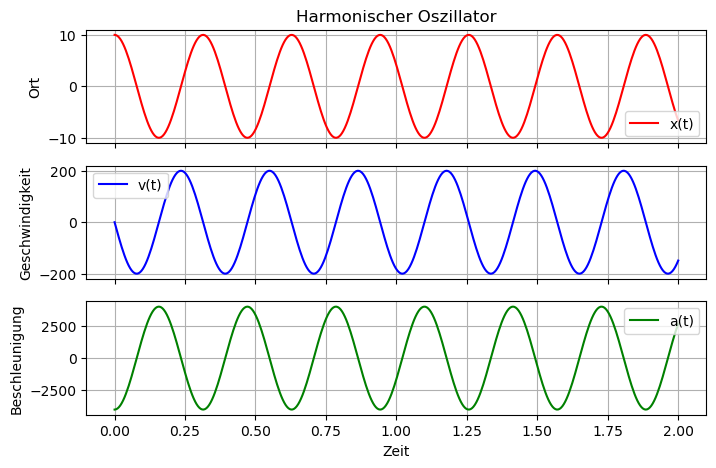

In [12]:
#plt.figure() # neues Fenster, IMMER ein mal für eine neue interaktive Grafik 

f,ax=plt.subplots(3,1,figsize=(8,5), sharex='col')

# Ort
ax[0].plot(tt_HO, x_HO_tt, 'r',label='x(t)') 
ax[0].set_title('Harmonischer Oszillator')     # fügt Titel ein   
ax[0].legend();               # fügt die Legende ein
ax[0].set_ylabel('Ort') # fügt y-Achsenbeschriftung ein  
ax[0].grid()             

# Geschwindigkeit
ax[1].plot(tt_HO, v_HO_tt, 'b',label='v(t)') 
ax[1].legend();               # fügt die Legende ein
ax[1].set_ylabel('Geschwindigkeit') # fügt y-Achsenbeschriftung ein  
ax[1].grid() 

# Beschleunigung
ax[2].plot(tt_HO, a_HO_tt, 'g',label='a(t)') 
ax[2].legend()               # fügt die Legende ein
ax[2].set_ylabel('Beschleunigung') #fügt y-Achsenbeschriftung ein
ax[2].grid() 

ax[2].set_xlabel('Zeit'); #fügt x-Achsenbeschriftung ein